In [122]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# 모델링 라이브러리
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

# 기타 라이브러리
import random
import gc
import os

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [124]:
cd data/kakr-4th-competition

[Errno 2] No such file or directory: 'data/kakr-4th-competition'
/Users/pym/data/kakr-4th-competition


In [235]:
test = pd.read_csv("./test.csv")

train = pd.read_csv("./train.csv")

sample_submission = pd.read_csv("./sample_submission.csv")

In [236]:
train.drop('id', axis = 1, inplace=True)
test.drop('id', axis = 1, inplace=True)
train.drop('education', axis = 1, inplace=True)
test.drop('education', axis = 1, inplace=True)
train.drop('native_country',axis=1, inplace=True)
train.drop('race',axis=1, inplace=True)
train.income = train.income.apply(lambda x : 1 if x =='>50K' else 0)
train_y = train['income']
train = train.iloc[:,:-1]

In [240]:
train.drop('fnlwgt',axis=1, inplace=True)

In [258]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
LE_encoder = OrdinalEncoder(list(train.columns))

# train, test 데이터에 인코딩 적용
train_a = LE_encoder.fit_transform(train)

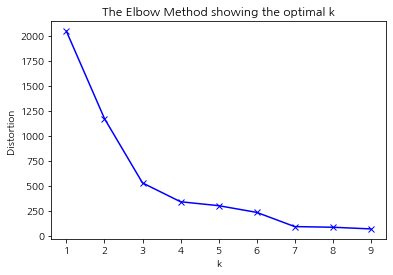

In [260]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(train_a)
    kmeanModel.fit(train_a)
    distortions.append(sum(np.min(cdist(train_a, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / train_a.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [261]:
from sklearn.cluster import KMeans

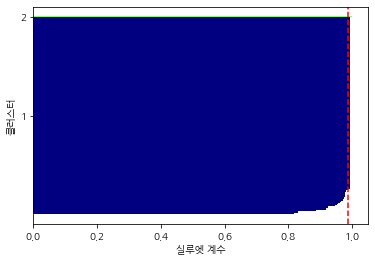

In [269]:
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km ==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('클러스터')
    plt.xlabel('실루엣 계수')
    plt.show()
    
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(train_a)
plotSilhouette(train_a,y_km)

In [265]:
train_a['income']=train_y

In [266]:
train_a

,age,workclass,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,income
0,40,1,9,1,1,1,1,0,0,60,1
1,17,1,5,2,2,2,1,0,0,20,0
2,18,1,10,2,3,2,1,0,0,16,0
3,21,1,10,2,4,2,2,0,0,25,0
4,24,1,10,2,5,3,2,0,0,20,0
...,...,...,...,...,...,...,...,...,...,...,...
26044,57,1,7,1,3,1,1,0,0,52,0
26045,23,1,13,2,4,2,1,0,0,40,0
26046,78,3,14,6,7,3,2,0,0,15,0
26047,26,4,9,2,4,2,2,0,0,40,0


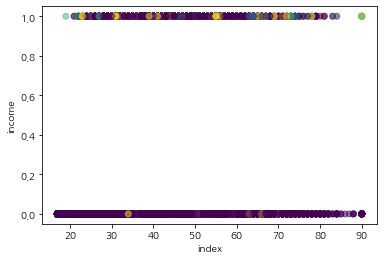

In [267]:
labels = y_km
# 클러스터링 결과를 시각화합니다
x = train_a.iloc[:, 0]
y = train_a.iloc[:, -1]
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('index')
plt.ylabel('income')
plt.show()

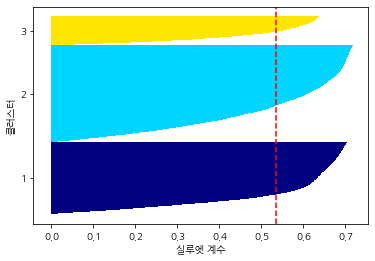

In [219]:
km = KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(train_a)
plotSilhouette(train_a,y_km)

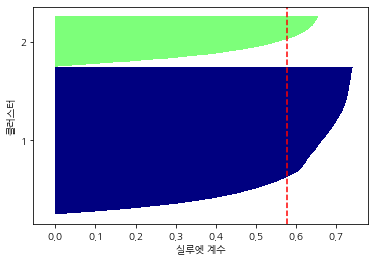

In [228]:
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(train_a)
plotSilhouette(train_a,y_km)

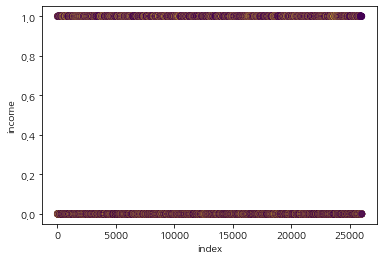

In [229]:
labels = y_km
# 클러스터링 결과를 시각화합니다
x = train_a.iloc[:, 0]
y = train_a.iloc[:, -2]
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('index')
plt.ylabel('income')
plt.show()

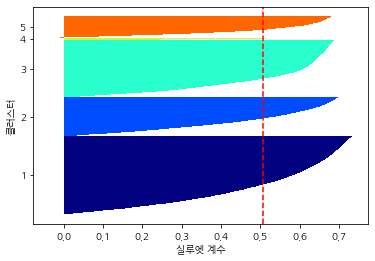

In [222]:
km = KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(train_a)
plotSilhouette(train_a,y_km)

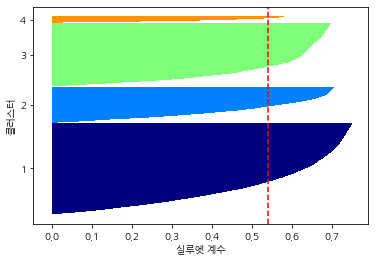

In [224]:
km = KMeans(n_clusters=4, random_state=0)
y_km = km.fit_predict(train_a)
plotSilhouette(train_a,y_km)